<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Transfer_Learning_with_Finetuning_and_Dropout_VGG16_with_Data_Augmentation_Dogs_vs_Cats_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
conv_base = VGG16(weights= 'imagenet', include_top=False, input_shape=(150,150,3))

The final feature map has shape (4, 4, 512).
We extract features from by calling the predict method on the conv_base model

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

In [15]:
train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_2000', target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/val_1000', target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4 , 4, 512) and we need to flatten before pushing them through a densely connected layer

In Keras, each layer has a parameter called 'trainable'. For freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained.

In [16]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary ()

conv_base.trainable=True
for layer in conv_base.layers[:-4]: #all layers but last 4 layers
    layer.trainable=False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [18]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 823s 8s/step - loss: 0.5834 - acc: 0.6760 - val_loss: 0.3130 - val_acc: 0.8540
Epoch 2/20
100/100 [==============================] - 820s 8s/step - loss: 0.4168 - acc: 0.8125 - val_loss: 0.2674 - val_acc: 0.8790
Epoch 3/20
100/100 [==============================] - 833s 8s/step - loss: 0.3537 - acc: 0.8375 - val_loss: 0.2310 - val_acc: 0.9000
Epoch 4/20
100/100 [==============================] - 849s 8s/step - loss: 0.3154 - acc: 0.8680 - val_loss: 0.2346 - val_acc: 0.8990
Epoch 5/20
100/100 [==============================] - 851s 9s/step - loss: 0.2743 - acc: 0.8800 - val_loss: 0.2153 - val_acc: 0.9080
Epoch 6/20
100/100 [==============================] - 847s 8s/step - loss: 0.2613 - acc: 0.8885 - val_loss: 0.2675 - val_acc: 0.9040
Epoch 7/20
100/100 [==============================] - 849s 8s/step - loss: 0.2367 - acc: 0.9115 - val_loss: 0.1952 - val_acc: 0.9260
Epoch 8/20
100/100 [==============================] - 848s 8s/step - 

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(1, len(acc)+1)

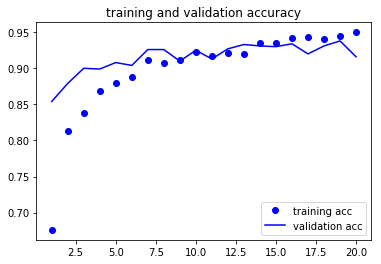

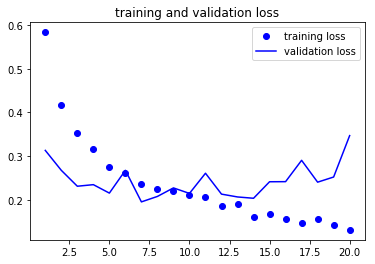

In [21]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()